In [7]:
import numpy as np

import pandas as pd

whisky = pd.read_csv("whiskies.txt")

whisky["Region"] = pd.read_csv("regions.txt")

# 5 rows, 5 columns
whisky.iloc[5:10, 0:5]

flavors = whisky.iloc[:, 2:14]

In [11]:
import matplotlib.pyplot as plt

corr_flavors = pd.DataFrame.corr(flavors)

plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

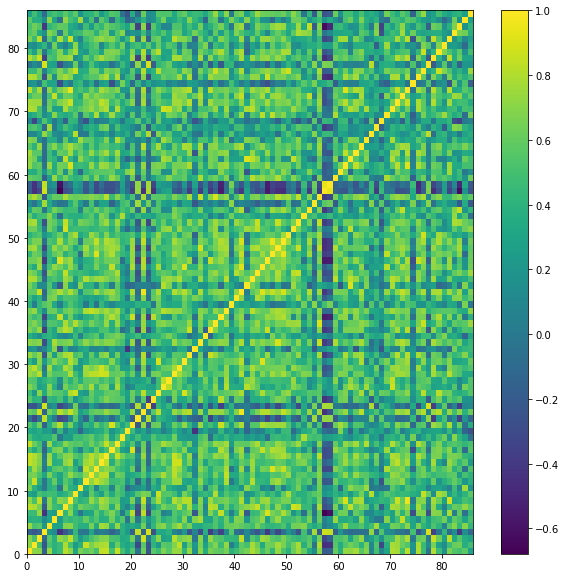

In [14]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())

plt.figure(figsize=(10, 10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.pdf")

In [21]:
from sklearn.cluster.bicluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=6, random_state=0)

model.fit(corr_whisky)

# how many whiskies belong to cluster 1, 2, etc.
np.sum(model.rows_, axis=1)

np.sum(model.rows_, axis=0)

# total of 6 clusters
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1])

C:\Users\iremu\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


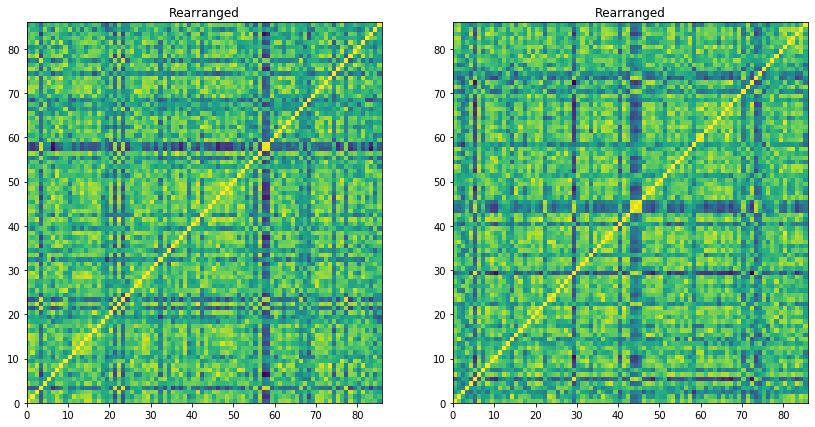

In [27]:
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.ix[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)

correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Rearranged")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")